type of the variable :  <class 'numpy.ndarray'>
shape of the x_train : (50000, 32, 32, 3)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
AxesImage(54,36;334.8x217.44)
the label is:  [6]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
the one hot label is:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Epoch 1/10
137/137 [

0.6725000143051147

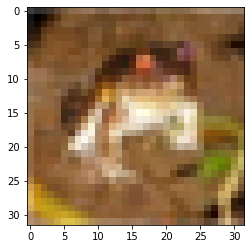

In [2]:
#load the data
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()  #load the data 

print("type of the variable : ",type(x_train))  #print the data types

print("shape of the x_train :",x_train.shape)  #print the shapes  it means x_train contain 50,000 rows 32 / 32 pixel images with the depth 3 ie;visible widthness (RGB)
 
print(x_train[0])     #show first image(index=0) from the training dataset  by numpy array format

from matplotlib import pyplot as plt    #show first image(index=0) from the training dataset  by picture format
img =plt.imshow(x_train[0])
print(img)

print("the label is: ",y_train[0])   #to print the label of the image 
                                          #zero-label is for :AEROPLANE
                                          #first label is for :AUTOMOBILE
                                          #second label is for: BIRD
                                          #third label is for : CAT
                                          #fourth label is for :DEAR
                                          #fifth label is for: DOG
                                          #sixth label is for :FROG
                                          #seventh label is for: HORSE
                                          #eighth label is for :SHEEP
                                          #ninth label is for: TRUCK

from keras.utils import to_categorical   #one-hot coding :convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

print(y_train_one_hot) #print the new lables in the training datasets(op:set of 10 digits in each row)

print("the one hot label is: ",y_train_one_hot[0])  #print an example of new laebels(op:here at the index-6 ,value is 1 that means for frog)

x_train=x_train/255    #Normalize the pixels in the images to be values between 0 and 1 (ie;here 0/255=0 and 255/255=1)
x_test=x_test/255

from keras.models import Sequential#Build the CNN(convolutional neural network)
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

mymodel1 = Sequential() #create the architecture

print(mymodel1)
mymodel1.add(Conv2D(32,(5,5),activation="relu",input_shape=(32,32,3)) )   #convolutional layer  (32-channels -convolutinal kernel,(5,5):-five rows and five columns),(32,32,3):32/32 pixels with the depth of 3

mymodel1.add(MaxPooling2D(pool_size=(2,2))) #maxpooling layer #means now image will be formed by 16/16 pixels which are 32/32 pixel previously

mymodel1.add(Conv2D(32,(5,5),activation="relu") )   #'relu':rectifier linear unit

mymodel1.add(MaxPooling2D(pool_size=(2,2)))



mymodel1.add(Flatten()) #flatten layer

mymodel1.add(Dense(1000,activation='relu'))

mymodel1.add(Dense(10,activation='softmax'))

mymodel1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])#compile the model

hist=mymodel1.fit(x_train,y_train_one_hot,batch_size=256,epochs=10,validation_split=0.3)#train the model

mymodel1.evaluate(x_test,y_test_one_hot)[1]   #get the model accuracy







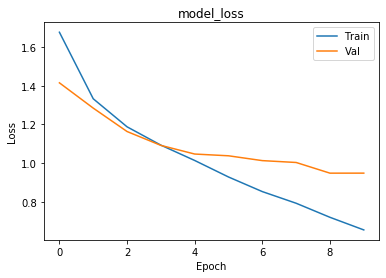

In [3]:
from matplotlib import pyplot as plt

plt.plot(hist.history['loss'])    #visualize the models loss
plt.plot(hist.history['val_loss'])
plt.title('model_loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

In [9]:
#plt.plot(hist.history['acc'])    #visualize the models accuracy
#plt.plot(hist.history['val_acc'])
#plt.title('model_accuracy')
#plt.ylabel('Accuracy')
#plt.xlabel('Epoch')
#plt.legend(['Train','Val'],loc='upper left')
#plt.show()

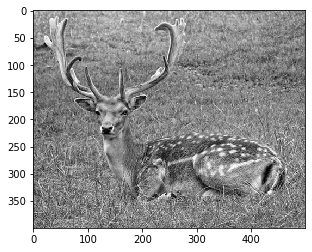

In [22]:
#load the image data 
import cv2
img = cv2.imread('C:/Users/sahoo/Desktop/deer1.jpg',0) # reads image 'opencv-logo.png' as grayscale
plt.imshow(img, cmap='gray')  #show the image

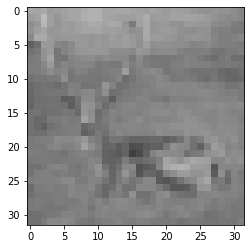

In [23]:
#resize the image
from skimage.transform import resize  
img_resized=resize(img,(32,32,3))
plt.imshow(img_resized)

In [19]:
#get the probabiity for each class
import numpy as np
prob2=mymodel1.predict(np.array([img_resized,]))
print(prob2)

[[3.6178407e-04 7.2152852e-03 3.6734663e-02 9.0990206e-03 8.0803126e-01
  1.6083805e-02 1.1393655e-01 5.0002988e-03 3.4893234e-03 4.7914546e-05]]


In [20]:
number_to_class=['aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
index=np.argsort(prob2[0,:]) #get the array value in ascending order

print('the class is : ',number_to_class[index[9]])
print("--it's accuracy is: ",prob2[0,index[9]])

the class is :  deer
--it's accuracy is:  0.80803126
